# Importing packages and data #

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("../datasets/advertising_and_sales_clean.csv")
df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [3]:
print(df.shape)

(4546, 5)


# Preparing data #

## OneHot Encoding categorical variables ##

In [4]:
df_dummies = pd.get_dummies(df['influencer'], drop_first = True).astype('int')
df = pd.concat([df, df_dummies], axis = 1)
df = df.drop('influencer', axis = 1)

In [5]:
print(df.head())

        tv     radio  social_media      sales  Mega  Micro  Nano
0  16000.0   6566.23       2907.98   54732.76     1      0     0
1  13000.0   9237.76       2409.57   46677.90     1      0     0
2  41000.0  15886.45       2913.41  150177.83     1      0     0
3  83000.0  30020.03       6922.30  298246.34     1      0     0
4  15000.0   8437.41       1406.00   56594.18     0      1     0


## Separating X and y ##

In [6]:
X = df.drop('sales', axis = 1).values
y = df['sales'].values

## Separating train and test samples ##

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

# Instantiating the model #

In [8]:
reg = LinearRegression()

# Fitting the model #

In [9]:
reg.fit(X_train, y_train)

LinearRegression()

In [10]:
test_score = reg.score(X_test, y_test)
print('Test set R-squared: {}'.format(np.round(test_score,2)))
overall_score = reg.score(X,y)
print(f'Overall R-squared: {np.round(overall_score,2)}')

Test set R-squared: 1.0
Overall R-squared: 1.0


In [11]:
y_pred = reg.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared = False)
print(f"MSE : {np.round(MSE,2)} \nRMSE : {np.round(RMSE,2)}")

MSE : 8389262.42 
RMSE : 2896.42


<Axes: >

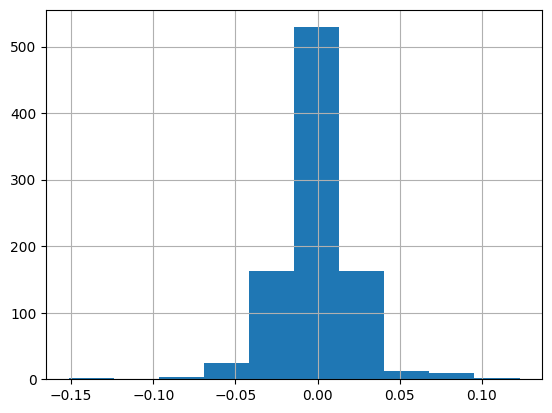

In [12]:
y_pred = reg.predict(X_test)
results = pd.concat([pd.DataFrame(y_pred, columns = ['y_pred']), pd.DataFrame(y_test, columns = ['y_test'])], axis = 1)
results['Error'] = results['y_pred'] - results['y_test']
results['Error_rel'] = (results['y_pred'] - results['y_test'])/results['y_test']
results['Error_rel'].hist()

In [14]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
kf = KFold(n_splits = 10, shuffle = True, random_state = 11)
reg = LinearRegression()
cv_results_MSE = cross_val_score(reg, X, y, cv = kf, scoring = 'neg_mean_squared_error')
print(np.mean(cv_results_MSE), np.std(cv_results_MSE))

-8718397.472774439 492656.70434033417


In [15]:
import statsmodels.api as sm
#add constant to predictor variables
X2 = df.drop('sales', axis = 1)
y2 = df['sales']

X2 = sm.add_constant(X2)
#fit linear regression model
model = sm.OLS(y2, X2).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.521e+05
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:29:34   Log-Likelihood:                -42768.
No. Observations:                4546   AIC:                         8.555e+04
Df Residuals:                    4539   BIC:                         8.560e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -103.3036    129.691     -0.797   